In [30]:
import requests
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# google sheets integration:
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

import warnings
warnings.filterwarnings("ignore")

# our own package for reading the data
import sddk

In [3]:
# to always print all columns expanded
pd.set_option('display.max_columns', None)

In [4]:
# read and execute our script for modelling dates
script_url = "https://raw.githubusercontent.com/sdam-au/modelling_temporal_uncertainty/master/scripts/modelling_distributions.py"
# execute the script
exec(requests.get(script_url).content)

In [5]:
# login to sciencedata
# (not necessary for reading-only)
conf = sddk.configure("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ········
connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [7]:
# to access our gsheet with data overview & metadata, you need a Google Service Account json file
# (see google-auth python package documentation to start with)
# I have mine located in my personal space on sciencedata.dk, so I read it from there:

# (1) read the file and parse its content
try:
    file_data = conf[0].get("https://sciencedata.dk/files/ServiceAccountsKey.json").json()
except:
    print("cannot find file ServiceAccountsKey.json")
# (2) transform the content into crendentials object
credentials = service_account.Credentials.from_service_account_info(file_data)
# (3) specify your usage of the credentials
scoped_credentials = credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive'])
# (4) use the constrained credentials for authentication of gspread package
gc = gspread.Client(auth=scoped_credentials)
# (5) establish connection with spreadsheets specified by their url
EDH_overview = gc.open_by_url("https://docs.google.com/spreadsheets/d/164MLxVcCZg95Bzf9fVyD1-iCA5V97eM3KAFllyhTvt4/edit?usp=sharing")

In [9]:
# read the EDH dataset from sciencedata.dk
publicfolder = "b6b6afdb969d378b70929e86e58ad975"
EDH = sddk.read_file("EDH_attrs_cleaned_2020-09-30.json", "df", publicfolder)
EDH.head(5)

reading file located in a public folder


,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
0,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,0071,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD
1,Feraudi,epitaph,4 cm,0200,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,0051,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD
2,Feraudi,honorific inscription,4.5-3 cm,0170,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,marble: rocks - metamorphic rocks,statue base,Baetica,(34) cm,[P(ublio) M]ummio [P(ubli) f(ilio)] / [Gal(eri...,Spain,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2006-08-31,Sevilla,Tomares,Latin,HD000003,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): [S]isenna ist falscher Kasus; folgende E...,https://www.trismegistos.org/text/220675,0131,None,before 1975,"Sevilla, Privatbesitz",None,None,None,None,None,None,"[-6.0459, 37.3728]",220675,"[http://www.trismegistos.org/place/025443, htt...",Publio Mummio Publi filio Galeria Sisennae Rut...,131 AD – 170 AD,21,unbestimmt,57,Statuenbasis,48,Marmor,1000,69,Ehreninschrift,honorific inscription,Cer

In [10]:
# make sure that we work with numeric values
EDH["not_before"] = pd.to_numeric(EDH["not_before"])
EDH["not_after"] = pd.to_numeric(EDH["not_after"])

In [11]:
EDH.head(5)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
0,Feraudi,epitaph,3.2-2 cm,130.0,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,71.0,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD
1,Feraudi,epitaph,4 cm,200.0,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,51.0,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD
2,Feraudi,honorific inscription,4.5-3 cm,170.0,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,marble: rocks - metamorphic rocks,statue base,Baetica,(34) cm,[P(ublio) M]ummio [P(ubli) f(ilio)] / [Gal(eri...,Spain,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2006-08-31,Sevilla,Tomares,Latin,HD000003,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): [S]isenna ist falscher Kasus; folgende E...,https://www.trismegistos.org/text/220675,131.0,None,before 1975,"Sevilla, Privatbesitz",None,None,None,None,None,None,"[-6.0459, 37.3728]",220675,"[http://www.trismegistos.org/place/025443, htt...",Publio Mummio Publi filio Galeria Sisennae Rut...,131 AD – 170 AD,21,unbestimmt,57,Statuenbasis,48,Marmor,1000,69,Ehreninschrift,honorific inscription

In [12]:
len(EDH)

81476

# EDH_dated

In [38]:
### how many of the inscriptions have at least one date
EDH_dated = EDH[(EDH["not_before"].notnull()) | (EDH["not_after"].notnull())]
len(EDH_dated)

59788

In [39]:
len(EDH_dated[EDH_dated["not_before"].notnull()])

59788

In [40]:
len(EDH_dated[EDH_dated["not_after"].notnull()])

56281

To sum up, there is 81,476 inscriptions in the current version of the database. 59,788 of them have at least `"not_before"` value.  56,281 have both `"not_before"` and `"not_after"`. 

Our modeling functions require at least one date, it might be either a precise date or *post quem* minus one year.

# Exploring "not_before" only

In [41]:
# look at inscriptions without "not_after"
EDH_not_before_only = EDH_dated[EDH_dated["not_after"].isnull()]
len(EDH_not_before_only)

3507

In [42]:
EDH_not_before_only.head(20)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
48,Feraudi,boundary inscription,7-8 cm,NaN,"AE 1983, 0032.; G. Pisani Sartorio, in: G. Bar...",checked with photo,(87) cm,M VALERIVS M F / M N MESSAL / P SERVEILIVS C F...,"[{'praenomen': 'M.', 'cognomen': 'Messalla*', ...",37 cm,travertine: rocks - chemische Sedimente,cippus,Roma,70 cm,M(arcus) Valerius M(arci) f(ilius) / M(ani) n(...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2011-03-17,Lazio,Roma,Latin,HD000049,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Terminalcippus.,https://www.trismegistos.org/text/265587,-54.0,La Magliana,None,"Mentana, Lap. Zeri",http://cil-old.bbaw.de/test06/bilder/datenbank...,None,[https://edh-www.adw.uni-heidelberg.de/fotos/F...,None,data available,None,"[12.4823, 41.8955]",265587,"[http://www.trismegistos.org/place/000172, htt...",Marcus Valerius Marci filius Mani nepos Messal...,54 BC,21,unbestimmt,85,Cippus,71,Travertin,1000,293,Grenzmarkierung,boundary inscription,Certain,87.0,70.0,37.0,Travertine,cippus,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,La Magliana,Certain,54 BC
51,Feraudi,votive inscription,4.3-3 cm,NaN,"AE 1983, 0045.; G. Barbieri, in: G. Barbieri (...",checked through autopsy,(59) cm,PRO SALVTE ET REDITV / ET VICTORIAS DOM N / IM...,"[{'gender': 'male', 'cognomen': 'Antoninus', '...",None,marble: rocks - metamorphic rocks,tabula,Roma?,(69.5) cm,Pro salute et reditu / et victorias(!) dom(ini...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma?,2011-01-17,Lazio?,Roma?,Latin,HD000052,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Inschrift für Caracalla aus der Collezione Mu...,https://www.trismegistos.org/text/251116,213.0,None,None,"Mentana, Lap. Zeri",http://cil-old.bbaw.de/test06/bilder/datenbank...,names of pagan deities,[https://edh-www.adw.uni-heidelberg.de/fotos/F...,None,None,data available,"[12.4823, 41.8955]",251116,"[http://www.trismegistos.org/place/000172, htt...",Pro salute et reditu et victor...,213 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,80,Weihinschrift,votive inscription,Certain,59.0,69.5,NaN,Marble,tabula,Certain,Roma,Uncertain,Italy,Certain,Roma,Uncertain,Lazio,Uncertain,Roma,Uncertain,NULL,NULL,213 AD
53,Cowey,votive inscription,None,NaN,"AE 1983, 0643. (B); J.E. Bogaers, in: B. Hartl...",checked with photo,(49) cm,[ ] ET GENIO LOCI / [ ]GG L VIDVCIVS / [ ]CIDV...,"[{'occupation': 'data available', 'praenomen':...",14 cm,sandstone: rocks - clastic sediments,tabula,Britannia,(63) cm,[---] et Genio loci / [et numinib(us) Au]gg(us...,United Kingdom,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Eburacum,2016-12-30,North Yorkshire,York,Latin,HD000054,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): Abweichungen in Lesung und Ergänzung. Se...,https://www.trismegistos.org/text/167301,221.0,Clementhorpe,1976,"York, Yorkshire Mus.",None,names of pagan deities,None,data available,data available,None,"[-

In [43]:
# look at the commentary column
EDH_not_before_only["commentary"] = EDH_not_before_only["commentary"].fillna("")
print("contains 'post quem': ", len(EDH_not_before_only[EDH_not_before_only["commentary"].str.contains("post quem")]))
print("contains 'ante quem': ", len(EDH_not_before_only[EDH_not_before_only["commentary"].str.contains("ante quem")]))

contains 'post quem':  3
contains 'ante quem':  2


In [44]:
# in how many cases there is a day and month?
len(EDH_not_before_only[EDH_not_before_only["origdate_text_clean"].str.contains(r"\d+\.\d+")])

725

In [45]:
print(EDH_not_before_only["origdate_text_clean"].tolist())

['54 BC', '213 AD', '221 AD', '406 AD', '146 AD', '116 AD', '12.2.224 AD', '182 AD', '34 AD', '7 AD', '9 AD', '13.8.232 AD', '332 AD', '270 AD', '201 AD', '79 AD', '211 AD', '306 AD', '218 AD', '238 AD', '98 AD', '8.2.157 AD', '11 BC', '17.9.67 BC', '275 AD', '15.5.87 BC', '14.10.205 AD', '1.9.114 AD', '27.12.159 AD', '27.12.159 AD', '8.2.157 AD', '9.5.136 AD', '38 AD', '108 AD', '19 AD', '15.7.60 AD', '102 AD', '102 AD', '253 AD', '163 AD', '23.8.219 AD', '260 AD', '133 AD', '45 BC', '197 AD', '198 AD', '84 AD', '253 AD', '28.10.144 AD', '26.8.258 AD', '47 AD', '253 AD', '541 AD', '121 AD', '544 AD', '208 AD', '1.2.225 AD', '390 AD', '202 AD', '11.6.313 AD', '11.6.297 AD', '1 AD – 50 AD', '1 AD – 50 AD', '11.6.291 AD', '11.6.159 AD', '20.2.98 AD', '48 AD', '27 BC', '48 AD', '8.210 AD', '202 AD', '17.6.437 AD', '100 AD', '28.8.163 AD', '146 AD', '95 AD', '22.11.106 BC', '214 AD', '1.6.42 AD', '15.5.53 AD', '377 AD', '75 AD', '54 BC', '250 AD', '398 AD', '21.5.55 AD', '262 AD', '166 AD'

In [46]:
# there are some with "NULL" in "origdate_text_clean"
EDH_not_before_only.tail(4)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean
81313,Osnabrügge,votive inscription,None,NaN,"AE 1961, 0239.; CIL 13, 05609.; Y. Le Bohec, I...",provisional,None,[ ] O M / / [ ]T GENIO LO[ ] / Q TA[ ]IVS / SA...,"[{'cognomen': 'Saturninus', 'gender': 'male', ...",None,limestone: rocks - clastic sediments,altar,Germania superior,None,[I(ovi)] O(ptimo) M(aximo) // [e]t Genio lo[ci...,France,https://edh-www.adw.uni-heidelberg.de/edh/insc...,(Civitas Lingonum),2020-05-28,Bourgogne-Franche-Comté,Pontailler-sur-Saône,Latin,HD082227,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Z. 1 befindet sich auf der Bekrönung. Z. 3: T...,None,150.0,ehemalige Kirche,1837,"Dijon, Mus. Arch.",None,names of pagan deities,[https://edh-www.adw.uni-heidelberg.de/fotos/F...,None,None,None,"[5.4128, 47.3048]",None,None,None,None,None,None,None,None,None,None,None,None,None,votive inscription,Certain,NaN,NaN,NaN,Limestone,altar,Certain,Germania superior,Certain,France,Certain,Civitas Lingonum,Uncertain Name,Bourgogne-Franche-Comté,Certain,Pontailler-sur-Saône,Certain,ehemalige Kirche,Certain,NULL
81344,Osnabrügge,honorific inscription,None,NaN,"M. Provost, in: M. Provost u. a. (Hrsg.), La C...",no image,(83) cm,] / POS[ ]I / DEDICATA / PRIMA [ / / IMP ANTON...,"[{'person_id': '1', 'name': 'Prima', 'cognomen...",None,None,None,Germania superior,(42) cm,------] / pos[---]I / dedicata / Prima [------...,France,https://edh-www.adw.uni-heidelberg.de/edh/insc...,(Civitas Lingonum),2020-05-28,Bourgogne-Franche-Comté,Pontailler-sur-Saône,Latin,HD082258,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Lesung und damit auch Datierung unsicher. Auf...,None,139.0,"Rue du 8 Mai 1945, Apotheke",1965,None,None,None,None,None,None,None,"[5.4155, 47.3047]",None,None,None,None,None,None,None,None,None,None,None,None,None,honorific inscription,Certain,83.0,42.0,NaN,NULL,NULL,NULL,Germania superior,Certain,France,Certain,Civitas Lingonum,Uncertain Name,Bourgogne-Franche-Comté,Certain,Pontailler-sur-Saône,Certain,"Rue du 8 Mai 1945, Apotheke",Certain,NULL
81425,Gräf,mile-/leaguestone,5 cm,NaN,"CIL 17, 02, 00134; Zeichnung.",checked with drawing,180 cm,IMP CAE[ ] / DIVI MAGNI [ ] / NINI PII [ ] DIV...,"[{'person_id': '1', 'praenomen': 'M.+++', 'cog...",None,Gesteine,mile-/leaguestone,Germania superior,45 cm,Imp(erator) Cae[s(ar)] / divi Magni [Anto]/nin...,France,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2020-08-10,Auvergne-Rhône-Alpes,Prévessin-Moëns,Latin,HD082339,https://edh-www.adw.uni-heidelberg.de/edh/geog...,Zahlreiche Ligaturen. Einige heute nicht mehr...,None,219.0,"Prévessin, de l’Assomption, Kirche, sekundär v...",None,"Prévessin-Moëns, Prévessin, de l’Assomption, K...",None,None,None,None,data available,None,"[6.0811, 46.2541]",None,None,None,None,None,None,None,None,None,None,None,None,None,mile-/leaguestone,Certain,180.0,45.0,NaN,Rock,mile-/leaguestone,Certain,Germania superior,Certain,France,Certain,NULL,

To sum up the observcation made here, there is no indication that dates with `not_before` only should be approached as instances of *post quem* (minus 1). Instead, at least in a vast majority of cases, it seems appropriate to assess these instances as **exact dates**. Therefore, in these cases, we will copy-paste the value from `not_before` to a new *not after* column: `not_after_new` to be used for our later modeling. Otherwise missing not after values would be automatically interpreted as instances of *post quem*. 

In [47]:
def check_not_after(row):
    if np.isnan(row["not_after"]):
        not_after_new = row["not_before"]
    else: 
        not_after_new = row["not_after"]
    return not_after_new

EDH_dated["not_after_new"] = EDH_dated.apply(lambda row: check_not_after(row), axis=1)

In [48]:
EDH_dated[EDH_dated["id"]=="HD000102"]

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,not_after_new
101,Cowey,military diploma,None,NaN,"AE 1983, 0639. (B); M.W.C. Hassall - R.S.O. To...",provisional,5.9 cm,[ ] / [ ] T AE[ ] / [ ]VS AVG PIVS P M / [ ] C...,"[{'cognomen': 'Hadrianus+ Antoninus+', 'name':...",1 cm,Bronze,tabula,Britannia,4.1 cm,[Imp(erator) Caesar divi Hadriani f(ilius) div...,United Kingdom,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Vindolanda,2020-03-02,Northumberland,Chesterholm,Latin,HD000102,https://edh-www.adw.uni-heidelberg.de/edh/geog...,"(B): Außenseite: Z.5: AE, Hassall: Ercu[io]; ...",https://www.trismegistos.org/text/167635,146.0,Lager,1980,"Vindolanda, Museum",None,names of pagan deities,None,data available,data available,data available,"[-2.3606, 54.9912]",167635,"[http://www.trismegistos.org/place/003201, htt...",Imperator Caesar divi Hadriani filius divi Tra...,146 AD,21,unbestimmt,257,Tafel,109,Bronze,1000,91,Militärdiplom,military diploma,Certain,5.9,4.1,1.0,Metal,tabula,Certain,Britannia,Certain,United Kingdom,Certain,Vindolanda,Certain,Northumberland,Certain,Chesterholm,Certain,Lager,Certain,146 AD,146.0


# Exploring durations

In [54]:
def get_duration(start, stop):
  try:
    duration = abs(int(start) - int(stop)) + 1
    if 0 in range(int(start),  int(stop)):
      duration = duration - 1
  except:
    duration = np.nan
  return duration
  

EDH_dated["duration"] = EDH_dated.apply(lambda row: get_duration(row["not_before"], row["not_after_new"]), axis=1)

In [55]:
EDH_dated.head(5)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,not_after_new,random_dates,duration
0,Feraudi,epitaph,3.2-2 cm,130.0,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,71.0,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD,130.0,"[72, 71, 103, 101, 115, 98, 114, 98, 84, 97, 9...",60
1,Feraudi,epitaph,4 cm,200.0,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,51.0,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD,200.0,"[144, 134, 166, 193, 84, 60, 159, 100, 136, 64...",150
2,Feraudi,honorific inscription,4.5-3 cm,170.0,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,marble: rocks - metamorphic rocks,statue base,Baetica,(34) cm,[P(ublio) M]ummio [P(ubli) f(ilio)] / [Gal(eri...,Spain,https://edh-www.adw.uni-heidelberg.de/edh/insc...,None,2006-08-31,Sevilla,Tomares,Latin,HD000003,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): [S]isenna ist falscher Kasus; folgende E...,https://www.trismegistos.org/text/220675,131.0,None,before 1975,"Sevilla, Privatbesitz",None,None,None,None,None,None,"[-6.0459, 37.3728]",220675,"[http://www.trismegistos.org/place/025443,

In [109]:
durations = []
previous_duration = 0
for duration in [1, 25, 75, 125, 200]:
    if previous_duration == 0:
        durations.append([str(duration), len(EDH_dated[(EDH_dated["duration"]<= duration) & (EDH_dated["duration"] > previous_duration)])])
    else:
        durations.append([str(previous_duration + 1) + "-" +  str(duration), len(EDH_dated[(EDH_dated["duration"]<= duration) & (EDH_dated["duration"] > previous_duration)])])
    previous_duration = duration
durations.append([">200", len(EDH_dated[EDH_dated["duration"]>200])])
durations_df = pd.DataFrame(durations, columns=["less or equal years", "n of inscriptions"])

Text(0.5, 1.0, "EDH: Length of interval 'not_before' - 'not_after'")

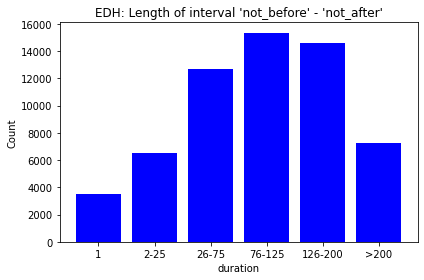

In [114]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.bar(durations_df["less or equal years"], durations_df["n of inscriptions"], color="b")
ax.set_xlabel("duration")
ax.set_ylabel("Count")
ax.set_title("EDH: Length of interval 'not_before' - 'not_after'")

In [115]:
sddk.write_file("SDAM_data/EDH/public/EDH_durations_bar.png", fig, conf)

A file with the same name ("EDH_durations_bar.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/EDH_durations_bar.png"


Text(0.5, 1.0, "EDH: Length of interval 'not_before' - 'not_after'")

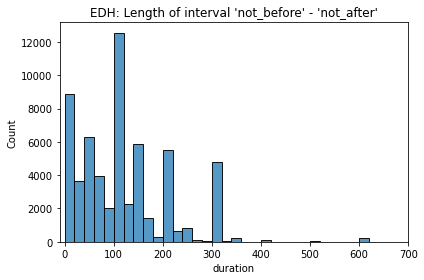

In [164]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
sns.histplot(EDH_dated["duration"], kde=False, bins=range(0, 700,20), ax=ax)
ax.set_xlim(-10, 700)
ax.set_title("EDH: Length of interval 'not_before' - 'not_after'")

In [117]:
sddk.write_file("SDAM_data/EDH/public/EDH_durations.png", fig, conf)

A file with the same name ("EDH_durations.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/EDH/public/EDH_durations.png"


# Random dates

In [118]:
%%time
# generate a list of 1000 random dates for each inscription in the dataset
EDH_dated["random_dates"] =EDH_dated.apply(lambda row: model_date(row["not_before"], row["not_after_new"], size=1000,), axis=1)

CPU times: user 30.1 s, sys: 575 ms, total: 30.7 s
Wall time: 30.7 s


In [119]:
%%time
# it takes approx. XX seconds
EDH_complete_simulations = timeblocks_from_randoms(EDH_dated, "random_dates", [-300, 700, 50])

CPU times: user 30 s, sys: 25.3 ms, total: 30 s
Wall time: 30 s


In [130]:
# example of one result
EDH_complete_simulations[0]

[((-300, -251), 11),
 ((-250, -201), 15),
 ((-200, -151), 39),
 ((-150, -101), 75),
 ((-100, -51), 238),
 ((-50, -1), 1103),
 ((1, 50), 4950),
 ((51, 100), 6898),
 ((101, 150), 10664),
 ((151, 200), 12905),
 ((201, 250), 11697),
 ((251, 300), 5673),
 ((301, 350), 1607),
 ((351, 400), 1394),
 ((401, 450), 743),
 ((451, 500), 588),
 ((501, 550), 459),
 ((551, 600), 395),
 ((601, 650), 143),
 ((651, 700), 110)]

In [134]:
first_10_sims = pd.DataFrame(EDH_complete_simulations[0], columns=["timeblock", "sim 0"])
for n in range(1, 10):
    first_10_sims["sim " + str(n)] = [tup[1] for tup in EDH_complete_simulations[n]]

In [135]:
first_10_sims

,timeblock,sim 0,sim 1,sim 2,sim 3,sim 4,sim 5,sim 6,sim 7,sim 8,sim 9
0,"(-300, -251)",11,14,7,9,12,10,16,11,11,14
1,"(-250, -201)",15,13,19,18,17,13,12,16,16,16
2,"(-200, -151)",39,42,34,39,39,43,40,47,39,37
3,"(-150, -101)",75,83,85,77,81,81,79,77,82,77
4,"(-100, -51)",238,220,237,241,236,244,215,228,229,238
5,"(-50, -1)",1103,1113,1111,1090,1097,1083,1127,1123,1100,1141
6,"(1, 50)",4950,4959,4987,4884,5002,5023,4921,4932,4940,4964
7,"(51, 100)",6898,7002,6844,6950,6870,6841,6916,6813,6979,6912
8,"(101, 150)",10664,10642,10522,10756,10719,10639,10649,10782,10717,10668
9,"(151, 200)",12905,12738,13041,12767,12797,12931,12906,12947,12809,12921


In [138]:
set_with_dataframe(EDH_overview.add_worksheet("first_10_sims", 1, 1), first_10_sims)

In [139]:
def desc_stat_from_simulations(simulations):
    tups_desc = []
    for n in range(len(simulations[0])):
        values = [sim[n][1] for sim in simulations]
        tups_desc.append((simulations[0][n][0], np.min(values), np.max(values), np.mean(values), np.median(values)))
    tups_desc_df = pd.DataFrame(tups_desc)
    tups_desc_df.columns = ["temp_block", "min", "max", "mean", "median"]
    return tups_desc_df

In [140]:
sims_by_blocks = desc_stat_from_simulations(EDH_complete_simulations)
#sims_by_blocks.set_index("temp_block", inplace=True)
sims_by_blocks

,temp_block,min,max,mean,median
0,"(-300, -251)",3,18,10.655,11.0
1,"(-250, -201)",10,25,16.250,16.0
2,"(-200, -151)",28,48,38.676,39.0
3,"(-150, -101)",67,95,80.716,81.0
4,"(-100, -51)",200,259,227.767,228.0
5,"(-50, -1)",1049,1156,1105.081,1105.0
6,"(1, 50)",4803,5137,4979.788,4981.0
7,"(51, 100)",6672,7002,6853.993,6852.0
8,"(101, 150)",10479,10908,10685.871,10687.0
9,"(151, 200)",12620,13140,12892.439,12893.0


In [146]:
# compare in how many instances is there less inscriptions for the first half of the 6th c. than for the second half.
# out of 1000
# e.g. 55 means 5.5%

len([sim for sim in EDH_complete_simulations if sim[16][1] < sim[17][1]])

55

In [141]:
set_with_dataframe(EDH_overview.add_worksheet("sims_by_blocks", 1, 1), sims_by_blocks)

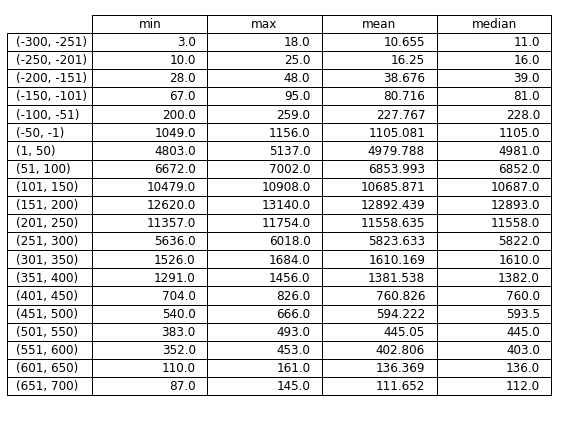

In [142]:
# plot the table

fig, ax = plt.subplots(figsize=(8,6), tight_layout=True)
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)
tabla = pd.plotting.table(ax, sims_by_blocks.set_index("temp_block"), loc='upper right', colWidths=[0.2]*len(sims_by_blocks.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) 

In [143]:
sddk.write_file("SDAM_data/temporal_uncertainty/EDH_sims_by_blocks_2020-10-02.png", fig, conf)

Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/temporal_uncertainty/EDH_sims_by_blocks_2020-10-02.png"


In [145]:
# compare in how many instances is there less inscriptions for the first half of the 6th c. than for the second half.
len([sim for sim in EDH_complete_simulations if sim[16][1] < sim[17][1]])

55

# Generate average dates (arithmetic means)
(for comparison)

In [147]:
# for a comparison, generate dates based on average values
def get_avr(row):
  try: 
    avr = int(np.round(np.mean([row["not_before"], row["not_after_new"]])))
  except:
    avr = np.nan
  return avr

EDH_dated["date_avr"] = EDH_dated.apply(lambda row: get_avr(row), axis=1)

#EDH_avr_blocks_ = dates_per_block(EDH_date_avr, sims_by_blocks.index.tolist())

In [151]:
print(EDH_dated["date_avr"].tolist()[:100])

[100, 126, 150, 176, 100, 110, -76, 150, 250, 150, 61, 350, 250, 82, 150, 126, -36, 150, 150, -36, 144, -16, 216, 370, 0, 76, 159, -65, 216, 150, 0, 50, 150, 250, 136, 250, 350, 176, -50, 250, -26, -50, 216, 26, 200, 86, 126, 150, -54, 100, 200, 213, 221, 406, 100, 211, 50, 100, 211, 0, 100, 210, 150, 250, 350, 200, 100, 150, -50, 100, 150, 212, 150, 150, 250, 100, 150, 250, 76, 150, 200, 166, 150, 150, -20, 150, 150, 300, 100, 136, 350, 150, 350, 50, 50, 150, 300, 146, 86, -50]


In [153]:
avr_by_block = dates_per_block(EDH_dated["date_avr"], sims_by_blocks["temp_block"].tolist())

In [154]:
avr_by_block_df = pd.DataFrame(avr_by_block)
avr_by_block_df.columns = ["temp_block", "count"]
avr_by_block_df

,temp_block,count
0,"(-300, -251)",4
1,"(-250, -201)",17
2,"(-200, -151)",37
3,"(-150, -101)",75
4,"(-100, -51)",159
5,"(-50, -1)",1025
6,"(1, 50)",4671
7,"(51, 100)",6609
8,"(101, 150)",13879
9,"(151, 200)",14078


Text(0.5, 1.0, 'Overview of all dated inscriptions (EDH): arithmetic mean vs simulation')

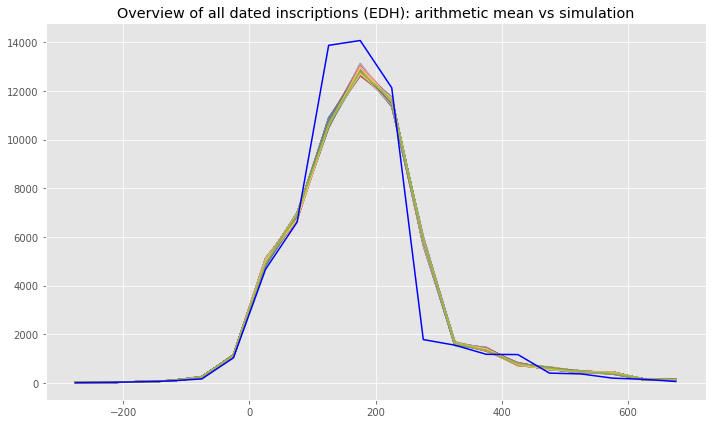

In [169]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)
plot_timeblocks_data(EDH_complete_simulations, ax)
x = [np.mean(tup) for tup in avr_by_block_df["temp_block"]]
y = avr_by_block_df["count"]
ax.plot(x, y, color="b")
ax.set_title("Overview of all dated inscriptions (EDH): arithmetic mean vs simulation")

In [ ]:
sddk.write_file("SDAM_data/temporal_uncertainty/EDH_mean_vs_simulation_2020-10-02.png", fig, conf)

# Comparison of temporal simulations by the type of inscription

In [170]:
EDH_dated.head(2)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,not_after_new,random_dates,duration,date_avr
0,Feraudi,epitaph,3.2-2 cm,130.0,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,71.0,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD,130.0,"[128, 73, 99, 114, 85, 87, 110, 112, 107, 114,...",60,100
1,Feraudi,epitaph,4 cm,200.0,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,51.0,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD,200.0,"[188, 68, 139, 140, 132, 168, 83, 93, 194, 84,...",150,126


In [171]:
EDH_dated["type_of_inscription_clean"].unique()

array(['epitaph', 'honorific inscription', 'votive inscription',
       'defixio', 'owner/artist inscription', 'mile-/leaguestone',
       'acclamation', 'boundary inscription',
       'building/dedicatory inscription', 'NULL', 'military diploma',
       'identification inscription', 'public legal inscription',
       'private legal inscription', 'label', 'list', 'calendar',
       'seat inscription', 'elogium', 'assignation inscription', 'prayer',
       'letter', 'adnuntiatio'], dtype=object)

In [172]:
inscriptions = ['epitaph', 'honorific inscription', 'votive inscription',
       'defixio', 'owner/artist inscription', 'mile-/leaguestone',
       'acclamation', 'boundary inscription',
       'building/dedicatory inscription', 'NULL', 'military diploma',
       'identification inscription', 'public legal inscription',
       'private legal inscription', 'label', 'list', 'calendar',
       'seat inscription', 'elogium', 'assignation inscription', 'prayer',
       'letter', 'adnuntiatio']

In [175]:
ins_types = []
for insc_type in inscriptions:
    ins_types.append([insc_type, len(EDH_dated[EDH_dated["type_of_inscription_clean"].str.contains(insc_type)])])
ins_types

[['epitaph', 25516],
 ['honorific inscription', 3576],
 ['votive inscription', 13018],
 ['defixio', 297],
 ['owner/artist inscription', 4224],
 ['mile-/leaguestone', 1630],
 ['acclamation', 470],
 ['boundary inscription', 203],
 ['building/dedicatory inscription', 3107],
 ['NULL', 4770],
 ['military diploma', 410],
 ['identification inscription', 1377],
 ['public legal inscription', 182],
 ['private legal inscription', 43],
 ['label', 232],
 ['list', 328],
 ['calendar', 11],
 ['seat inscription', 66],
 ['elogium', 138],
 ['assignation inscription', 16],
 ['prayer', 50],
 ['letter', 121],
 ['adnuntiatio', 3]]

In [178]:
def getKey(item):
    return item[1]
sorted(ins_types, key=getKey, reverse=True)

[['epitaph', 25516],
 ['votive inscription', 13018],
 ['NULL', 4770],
 ['owner/artist inscription', 4224],
 ['honorific inscription', 3576],
 ['building/dedicatory inscription', 3107],
 ['mile-/leaguestone', 1630],
 ['identification inscription', 1377],
 ['acclamation', 470],
 ['military diploma', 410],
 ['list', 328],
 ['defixio', 297],
 ['label', 232],
 ['boundary inscription', 203],
 ['public legal inscription', 182],
 ['elogium', 138],
 ['letter', 121],
 ['seat inscription', 66],
 ['prayer', 50],
 ['private legal inscription', 43],
 ['assignation inscription', 16],
 ['calendar', 11],
 ['adnuntiatio', 3]]

TypeError: 'str' object does not support item assignment

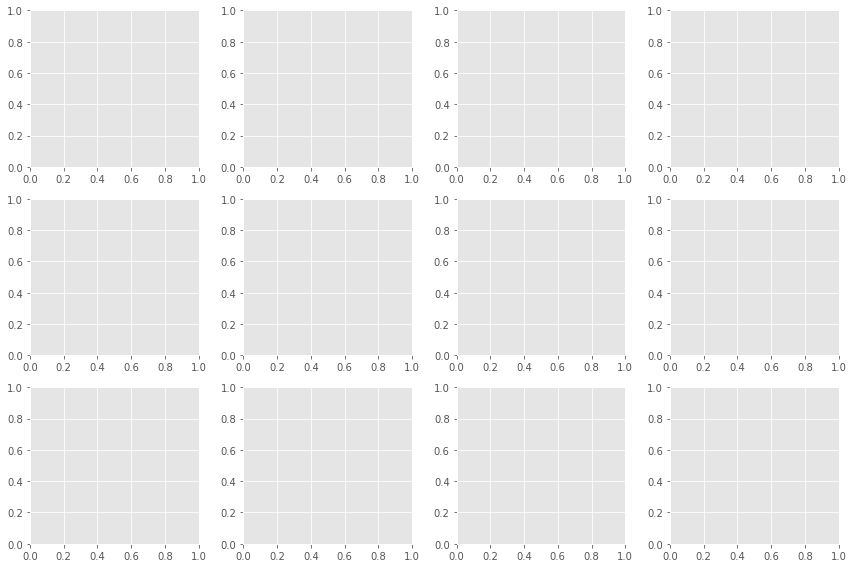

In [179]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8), tight_layout=True)

for ax, insc_type in zip(axs.ravel(), inscriptions[:12]):
  type_insc_df = EDH_dated[EDH_dated["type_of_inscription_clean"].str.contains(insc_type)]
  inscription_sim = timeblocks_from_randoms(type_insc_df,  "random_dates", [-400, 600, 100])
  plot_timeblocks_data(inscription_sim, ax=ax)
  ax.set_xticks([-400, -200, 1, 200, 400, 600])
  ax.set_title(insc_type)

In [93]:
sddk.write_file("SDAM_data/EDH/public/EDH_temporal_inscription_types_2020-10-01.png", fig, conf)

A file with the same name ("EDH_temporal_inscription_types_2020-10-01.png") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'matplotlib.figure.Figure'> object has been succefully written as "https://sciencedata.dk/sharingout/648597%40au.dk/SDAM_root/SDAM_data/EDH/public/EDH_temporal_inscription_types_2020-10-01.png"


# Comparison of temporal simulations by Roman Province

In [94]:
EDH_dated.head(2)

,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,findspot,year_of_find,present_location,external_image_uris,religion,fotos,geography,social_economic_legal_history,military,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,not_after_new,duration,random_dates,date_avr
0,Feraudi,epitaph,3.2-2 cm,130.0,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,71.0,None,None,None,None,None,None,None,None,None,"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD,130.0,60,"[124, 126, 110, 89, 122, 96, 114, 81, 127, 89,...",100
1,Feraudi,epitaph,4 cm,200.0,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",None,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,51.0,"Via Nomentana, S. Alessandro, Kirche",1937,None,None,None,None,None,None,None,"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD,200.0,150,"[186, 60, 160, 154, 65, 143, 180, 129, 103, 16...",126


In [95]:
EDH_dated["province_label_clean"].unique()

array(['Latium et Campania (Regio I)', 'Roma', 'Baetica', 'Britannia',
       'Aemilia (Regio VIII)', 'Hispania citerior', 'unknown',
       'Alpes Maritimae', 'Apulia et Calabria (Regio II)', 'Narbonensis',
       'Lusitania', 'Samnium (Regio IV)', 'Etruria (Regio VII)', 'Raetia',
       'Pannonia superior', 'Lugdunensis', 'Moesia inferior', 'Dalmatia',
       'Belgica', 'Umbria (Regio VI)', 'Germania inferior',
       'Germania superior', 'Africa Proconsularis', 'Dacia', 'Aquitania',
       'Arabia', 'Mauretania Caesariensis', 'Noricum', 'Numidia',
       'Pannonia inferior', 'Venetia et Histria (Regio X)', 'Barbaricum',
       'Transpadana (Regio XI)', 'Sardinia', 'Aegyptus',
       'Mauretania Tingitana', 'Asia', 'Syria', 'Bithynia et Pontus',
       'Cyrene', 'Moesia superior', 'Macedonia',
       'Bruttium et Lucania (Regio III)', 'Picenum (Regio V)', 'Epirus',
       'Alpes Poeninae', 'Galatia', 'Liguria (Regio IX)',
       'Sicilia, Melita', 'Iudaea', 'Corsica', 'Achaia',
     

In [96]:
provinces = ['Latium et Campania (Regio I)', 'Roma', 'Baetica', 'Britannia',
       'Aemilia (Regio VIII)', 'Hispania citerior', 'unknown',
       'Alpes Maritimae', 'Apulia et Calabria (Regio II)', 'Narbonensis',
       'Lusitania', 'Samnium (Regio IV)', 'Etruria (Regio VII)', 'Raetia',
       'Pannonia superior', 'Lugdunensis', 'Moesia inferior', 'Dalmatia',
       'Belgica', 'Umbria (Regio VI)', 'Germania inferior',
       'Germania superior', 'Africa Proconsularis', 'Dacia', 'Aquitania',
       'Arabia', 'Mauretania Caesariensis', 'Noricum', 'Numidia',
       'Pannonia inferior', 'Venetia et Histria (Regio X)', 'Barbaricum',
       'Transpadana (Regio XI)', 'Sardinia', 'Aegyptus',
       'Mauretania Tingitana', 'Asia', 'Syria', 'Bithynia et Pontus',
       'Cyrene', 'Moesia superior', 'Macedonia',
       'Bruttium et Lucania (Regio III)', 'Picenum (Regio V)', 'Epirus',
       'Alpes Poeninae', 'Galatia', 'Liguria (Regio IX)',
       'Sicilia, Melita', 'Iudaea', 'Corsica', 'Achaia',
       'Lycia et Pamphylia', 'Cappadocia', 'Mesopotamia', 'Alpes Graiae',
       'Regnum Bospori', 'Creta', 'Tuscia et Umbria', 'Cyprus', 'Thracia',
       'Cilicia', 'Alpes Cottiae', 'Armenia', 'Macedonia, Epirus']

In [97]:
for province in provinces:
    print(province, len(EDH_dated[EDH_dated["province_label_clean"].str.contains(province)]))

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Latium et Campania (Regio I) 0
Roma 2556
Baetica 2431
Britannia 4402
Aemilia (Regio VIII) 0
Hispania citerior 2668
unknown 248
Alpes Maritimae 408
Apulia et Calabria (Regio II) 0
Narbonensis 293
Lusitania 507
Samnium (Regio IV) 0
Etruria (Regio VII) 0
Raetia 976
Pannonia superior 4182
Lugdunensis 125
Moesia inferior 1849
Dalmatia 7543
Belgica 970
Umbria (Regio VI) 0
Germania inferior 3003
Germania superior 6559
Africa Proconsularis 1228
Dacia 3485
Aquitania 62
Arabia 63
Mauretania Caesariensis 262
Noricum 2726
Numidia 1599
Pannonia inferior 3109
Venetia et Histria (Regio X) 0
Barbaricum 130
Transpadana (Regio XI) 0
Sardinia 34
Aegyptus 157
Mauretania Tingitana 39
Asia 215
Syria 88
Bithynia et Pontus 131
Cyrene 16
Moesia superior 1327
Macedonia 1093
Bruttium et Lucania (Regio III) 0
Picenum (Regio V) 0
Epirus 130
Alpes Poeninae 194
Galatia 55
Liguria (Regio IX) 0
Sicilia, Melita 30
Iudaea 82
Corsica 14
Achaia 636
Lycia et Pamphylia 27
Cappadocia 20
Mesopotamia 4
Alpes Graiae 76
Regnum B

In [ ]:
# does not work - index out of range?

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8), tight_layout=True)

for ax, province in zip(axs.ravel(), provinces[:12]):
  province_df = EDH_dated[EDH_dated["province_label_clean"].str.contains(province)]
  province_sim = timeblocks_from_randoms(province_df,  "random_dates", [-400, 600, 100])
  plot_timeblocks_data(province_sim, ax=ax)
  ax.set_xticks([-400, -200, 1, 200, 400, 600])
  ax.set_title(province)

IndexError: list index out of range

In [ ]:
sddk.write_file("SDAM_data/EDH/public/EDH_temporal_provinces_2020-10-01.png", fig, conf)

In [ ]:
# How can I plot only the provinces with most inscriptions?